In [1]:
#Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Data loading 

In [2]:
from sklearn.datasets import load_diabetes
# from sklearn dataset to panda dataframe
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

data_sk = load_diabetes()

data = sklearn_to_df(data_sk)

In [3]:
data_sk

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
#dataset information provided by sklearn.
print(data_sk.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [5]:
#checking the features set and target 
data.head(-1)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
436,-0.056370,-0.044642,-0.074108,-0.050428,-0.024960,-0.047034,0.092820,-0.076395,-0.061177,-0.046641,48.0
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


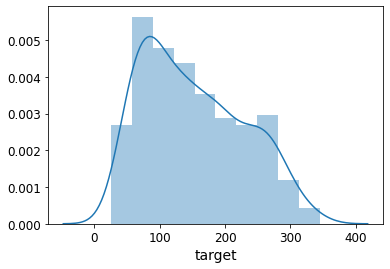

In [7]:
#checking the distrbution of the target.
sns.distplot(data["target"], bins= 10)

In [8]:
# Features that correlates to our target. 
corr_matrix = data.corr()
corr_matrix['target'].sort_values(ascending=False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441484
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

## Data Segregation

In [9]:
from sklearn.model_selection import train_test_split

X = data.drop(columns="target")
y = data["target"]
# split the dataset to train and test sets. 
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size= 0.20, random_state=0)

In [10]:
baseline = np.mean(y)
#Get an array with baseline with the size of the testing dataset 
y_baseline = np.repeat(baseline, len(y_test))
# import the metric 
from sklearn.metrics import mean_squared_error
#y_test are the true values of y 
naive_RSME = mean_squared_error(y_test, y_baseline)
naive_RSME=np.sqrt(naive_RSME)
naive_RSME

71.64007462993281

In [11]:
from sklearn.dummy import DummyRegressor
# Create the dummy regessor.
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
DummyRegressor()
# baseline error for the dummy regressor.
regression_RSME = mean_squared_error(y_test, dummy_regr.predict(X_test))
regression_baseline = np.sqrt(regression_RSME)
regression_baseline

71.65740368288068

In [12]:
# fucntion to print the results of the selected model against dummy regressor and naive 
def results(clf, X_train, X_test, y_train, y_test):
    from sklearn.metrics import mean_squared_error
    train_predict = clf.predict(X_train)
    test_predict = clf.predict(X_test)
    RMSE_training = np.sqrt(mean_squared_error(y_train, train_predict))
    RMSE_test=np.sqrt(mean_squared_error(y_test, test_predict))
    print('The naive RMSE baseline is ', naive_RSME)
    print('The regression_baseline is ', regression_baseline)
    print('The model performance in training is ', RMSE_training)
    print('The model performance in testing is ', RMSE_test)
    
   

### Model 1 Selection

In [13]:
from sklearn.svm import SVR
# 
svm_reg_rbf = SVR(kernel='rbf')

## Model 1 results before hyperparameters tuning.

In [14]:
svm_reg_rbf.fit(X_train, y_train)

results(svm_reg_rbf, X_train, X_test, y_train, y_test )

The naive RMSE baseline is  71.64007462993281
The regression_baseline is  71.65740368288068
The model performance in training is  70.60131652005208
The model performance in testing is  66.86508404451277


## Model 1 Training and Hyperparameter Tuning 

In [12]:
from sklearn.model_selection import GridSearchCV
# usage of gridsearch for hyperparameter selection

#######################################
# hyperparameter ranges 
C_range = np.logspace(2, 4 , 30)
gamma_range = np.logspace(-4, -1, 30)
epsilon_range = np.linspace(0.1,0.9)
#######################################

param_grid = dict(gamma=gamma_range, C=C_range, epsilon=epsilon_range)

# initialize gridsearch
grid_search_rbf = GridSearchCV(svm_reg_rbf, param_grid, n_jobs=-1, verbose=10,
                                        cv=5, scoring="neg_root_mean_squared_error")
    
# fit and find the best parameters.    
grid_search_rbf.fit(X_train,y_train)
grid_search_rbf.best_params_

Fitting 5 folds for each of 45000 candidates, totalling 225000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1832s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0470s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0792s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0

{'C': 2807.2162039411755, 'epsilon': 0.1, 'gamma': 0.1}

In [22]:
C_range

array([   100.        ,    126.89610032,    161.02620276,    204.33597179,
          259.29437974,    329.03445623,    417.53189366,    529.83169063,
          672.33575365,    853.16785242,   1082.63673387,   1373.82379588,
         1743.3288222 ,   2212.21629107,   2807.21620394,   3562.24789026,
         4520.35365636,   5736.15251045,   7278.95384398,   9236.70857187,
        11721.02297533,  14873.52107294,  18873.91822135,  23950.26619987,
        30391.95382313,  38566.20421163,  48939.00918477,  62101.69418916,
        78804.6281567 , 100000.        ])

In [13]:
# assign the best model with the best parameter 
svm_rbf_reg = grid_search_rbf.best_estimator_

## Candidate Model 1 Evaluation

In [14]:
# compare results dummy and naive regressor.
results(svm_rbf_reg, X_train, X_test, y_train, y_test )

The naive RMSE baseline is  71.64007462993281
The regression_baseline is  71.65740368288068
The model performance in training is  52.72247520029191
The model performance in testing is  58.4375534668241


## Model 2 Selection

In [15]:
svm_reg_poly = SVR(kernel='poly')

## Model 2 results before hyperparameters tuning.

In [17]:
svm_reg_poly.fit(X_train, y_train)

results(svm_reg_poly, X_train, X_test, y_train, y_test )

The naive RMSE baseline is  71.64007462993281
The regression_baseline is  71.65740368288068
The model performance in training is  66.43206643624907
The model performance in testing is  65.32834481110129


## Model 2 Training and Hyperparameter Tuning 

In [15]:

#######################################
# hyperparameter ranges 
C_range = np.logspace(2, 5 , 30)
gamma_range = np.logspace(-3, -1, 20)
epsilon_range = np.linspace(0.1,0.9)
degree_range = list(range(1,4))

#######################################
param_grid = dict(gamma=gamma_range, C=C_range, epsilon=epsilon_range, degree=degree_range)


grid_search_poly = GridSearchCV(svm_reg_poly, param_grid, n_jobs=-1, verbose=10,
                                        cv=5, scoring="neg_root_mean_squared_error")
    
# initialize gridsearch    
grid_search_poly.fit(X_train,y_train)
grid_search_poly.best_params_

Fitting 5 folds for each of 90000 candidates, totalling 450000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0122s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0890s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0744s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0968s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Batch com

[Parallel(n_jobs=-1)]: Done 258280 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 262408 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 266536 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 270728 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 274920 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 279176 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 283432 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 287752 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 292072 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 296456 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 300840 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 305288 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 309736 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 314248 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 318760 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Do

{'C': 7278.953843983146,
 'degree': 1,
 'epsilon': 0.1,
 'gamma': 0.07847599703514611}

In [16]:
# assign the best model with the best parameter 
svm_poly_reg = grid_search_poly.best_estimator_

## Candidate Model 2 Evaluation

In [17]:
# compare results dummy and naive regressor.
results(svm_poly_reg, X_train, X_test, y_train, y_test)

The naive RMSE baseline is  71.64007462993281
The regression_baseline is  71.65740368288068
The model performance in training is  52.78348641564139
The model performance in testing is  58.49944180775057
